## 라이브러리 및 데이터 로드

In [109]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt



# (2) 설치된 한글 폰트로 설정
# mat.rcParams['font.family'] = 'Black Han Sans'

sns.set(style='whitegrid')


plt.rcParams['font.family'] = 'NanumGothic'

In [289]:
df = pd.read_excel('./data/청년실업률.xlsx')
df.info
df

C:\Users\park123\anaconda3\envs\aischool_env\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,서울특별시,서울특별시.1,서울특별시.2,서울특별시.3,서울특별시.4,서울특별시.5,서울특별시.6,서울특별시.7,서울특별시.8,...,서울특별시.14,서울특별시.15,서울특별시.16,서울특별시.17,서울특별시.18,서울특별시.19,서울특별시.20,서울특별시.21,서울특별시.22,서울특별시.23
0,시점,인구,인구,인구,소득과 소비,소득과 소비,소득과 소비,소득과 소비,고용과 노동,고용과 노동,...,고용과 노동,고용과 노동,고용과 노동,주거와 교통,성장과 안정,성장과 안정,성장과 안정,성장과 안정,성장과 안정,사회통합
1,시점,순이동인구 (명),전입인구 (명),전출인구 (명),소비자물가지수 (2015=100),예금은행대출금액 (십억원),예금은행예금액 (십억원),소비자물가 등락률 (%),경제활동인구(시도) (천명),경제활동참가율(시도) (%),...,취업자증감 (천명),청년실업률 (%),구직급여 신청자수 (명),지가변동률 (%),제조업생산 증감률 (%),서비스업생산 증감률 (%),백화점판매액 (백만원),대형소매점판매액 (백만원),광공업생산지수 (2015=100),요양기관수 (개소)
2,2000 1/4,1530.0,564339.0,562809.0,64.98,122995.0,182568.0,2.3,4884.0,61.1,...,-,10.4,-,0.46,-,-,-,-,99.2,-
3,2000 2/4,-13175.0,589240.0,602415.0,64.93,134786.0,199346.0,2.1,4897.0,61.1,...,-,7.2,-,0.39,-,-,-,-,98.3,-
4,2000 3/4,-4165.0,492407.0,496572.0,65.72,145208.0,200237.0,3.2,4940.0,61.6,...,190.6,7.2,-,0.29,-,-,-,-,100.5,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2016 4/4,-43266.0,395886.0,439152.0,101.83,544592.0,628071.0,1.5,5385.0,62.8,...,11.6,9.0,44410.0,-,-2.8,2.6,3594281.0,5278625.0,113.8,21786.0
70,2017 1/4,-8765.0,419262.0,428027.0,102.95,545106.0,620436.0,2.1,5368.0,62.7,...,8.4,11.0,59403.0,-,0.0,2.7,2947942.0,4631021.0,110.4,21821.0
71,2017 2/4,-19010.0,352300.0,371310.0,103.02,550278.0,631199.0,2.1,5414.0,63.2,...,23.0,10.3,44503.0,-,-2.3,2.0,2898327.0,4572130.0,93.3,21958.0
72,2017 3/4,-30565.0,366290.0,396855.0,103.65,563860.0,644338.0,2.4,5432.0,63.5,...,26.9,9.8,44530.0,-,4.8,3.2,2851387.0,4691097.0,100.0,21998.0


In [290]:
df.columns = df.loc[df.index[1], :]
df = df.drop(index=[0, 1]).reset_index()

In [291]:
unemployment = df[['청년실업률 (%)']].astype('float32')
unemployment.index = df['시점']
unemployment.reset_index()

1,시점,청년실업률 (%)
0,2000 1/4,10.4
1,2000 2/4,7.2
2,2000 3/4,7.2
3,2000 4/4,7.5
4,2001 1/4,10.5
...,...,...
67,2016 4/4,9.0
68,2017 1/4,11.0
69,2017 2/4,10.3
70,2017 3/4,9.8


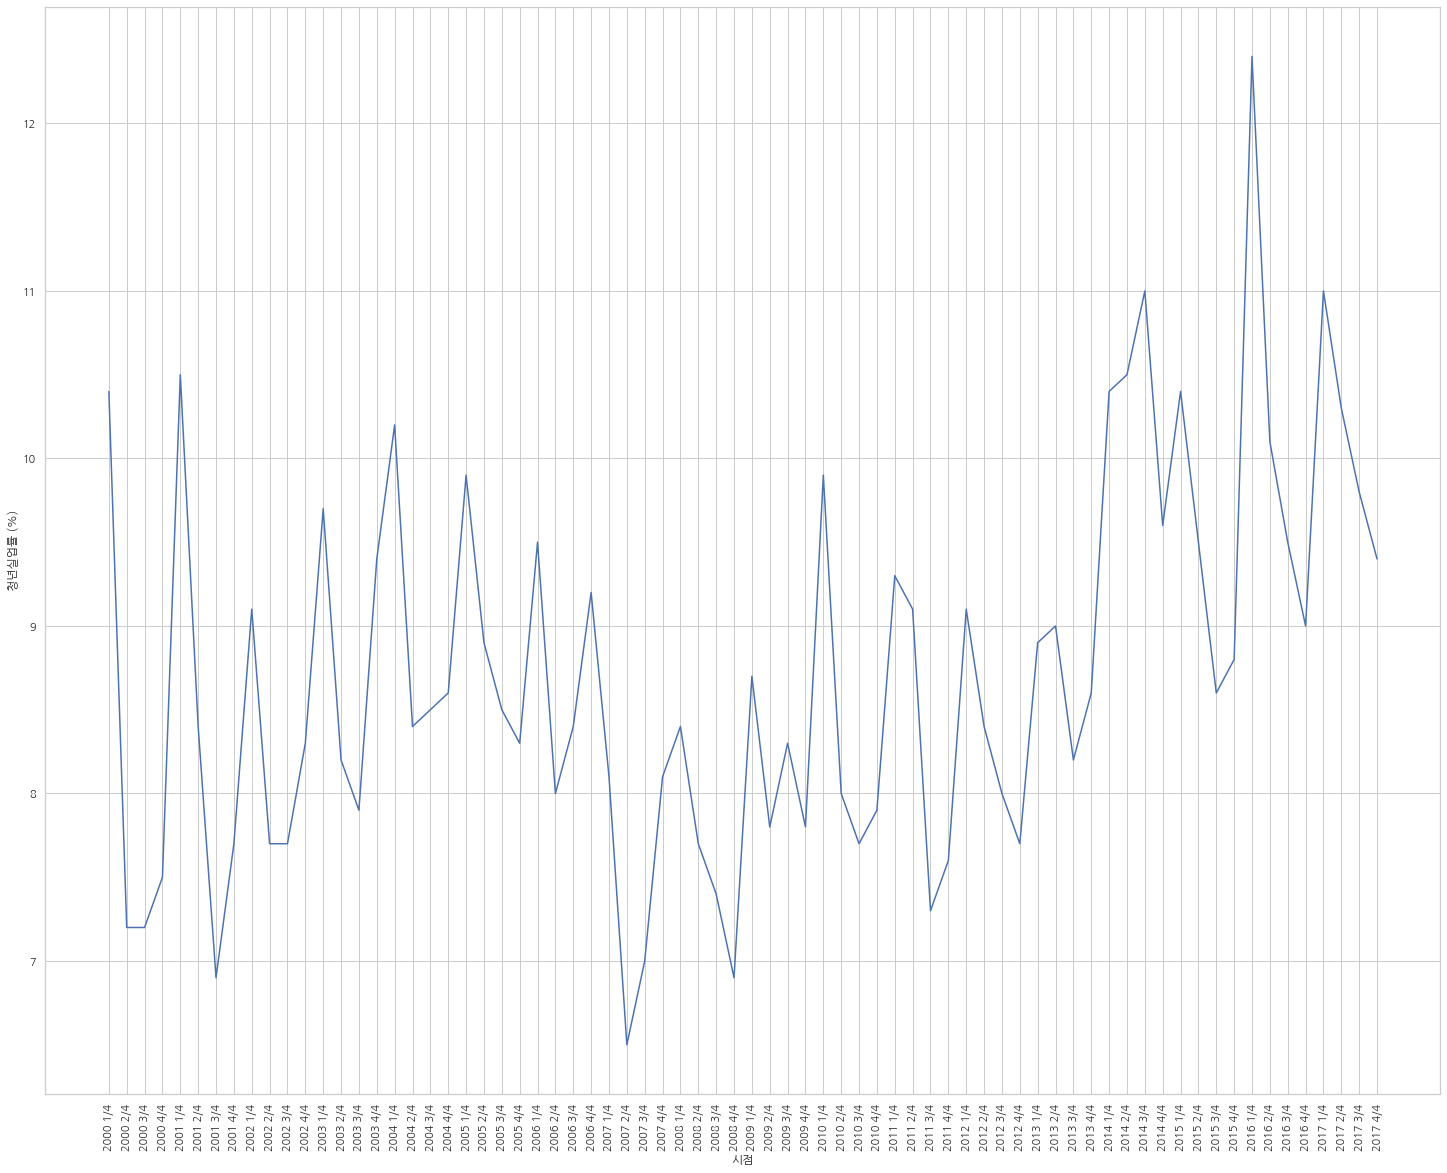

In [292]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.lineplot(data=unemployment, x='시점', y='청년실업률 (%)')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.show()

## 단순이동평균

In [294]:
unemployment['MA4'] = unemployment['청년실업률 (%)'].rolling(4, closed='left').mean()
unemployment['MA8'] = unemployment['청년실업률 (%)'].rolling(8, closed='left').mean()

unemployment

1,청년실업률 (%),MA4,MA8
시점,,,
2000 1/4,10.4,NaN,NaN
2000 2/4,7.2,NaN,NaN
2000 3/4,7.2,NaN,NaN
2000 4/4,7.5,NaN,NaN
2001 1/4,10.5,8.075,NaN
...,...,...,...
2016 4/4,9.0,10.200,9.8625
2017 1/4,11.0,10.250,9.7875
2017 2/4,10.3,9.900,9.8625


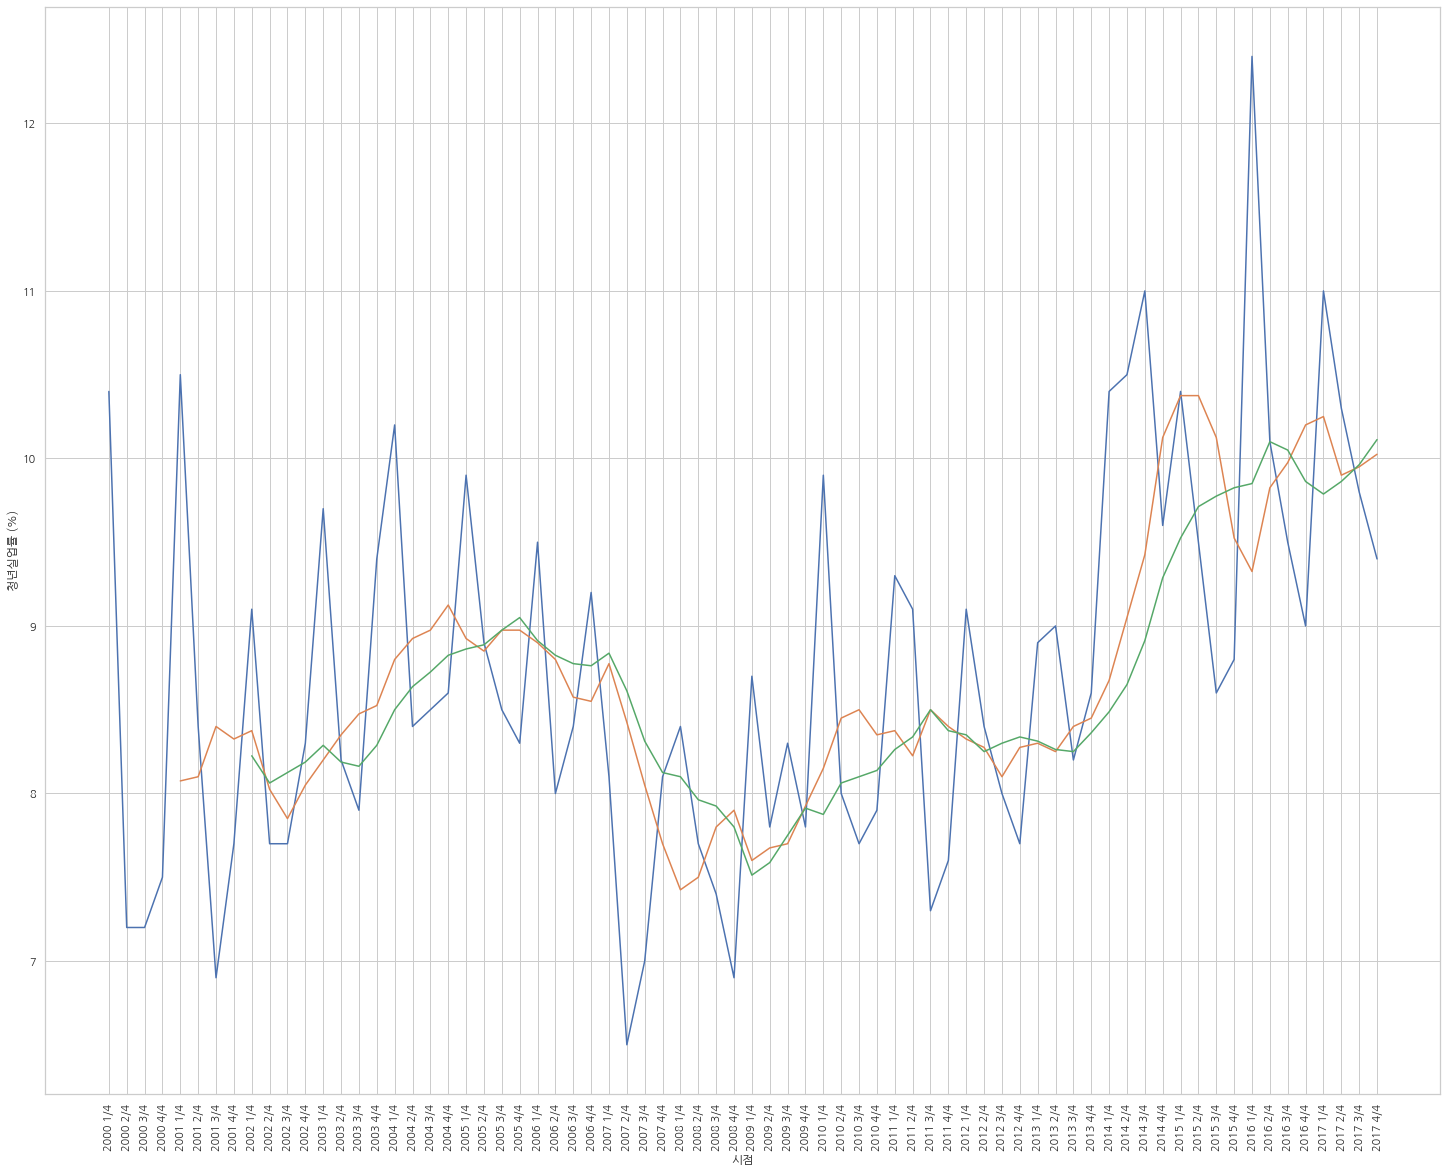

In [295]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.lineplot(data=unemployment, x='시점', y='청년실업률 (%)')
sns.lineplot(data=unemployment, x='시점', y='MA4')
sns.lineplot(data=unemployment, x='시점', y='MA8')

plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.show()

In [296]:
#col1 = 실제, col2 = pred
def error_cal(df, col1, col2):
    # nan 없는 행만 계산하기 위함
    index = (df[col1].isna() | df[col2].isna()) == False
    tmp = df.loc[index, :]
    y, y0 = tmp[col1], tmp[col2]
    error = y - y0

    #MSE
    MSE = np.mean(np.square(error).mean())

    #RMSE
    RMSE = np.sqrt(MSE)
    
    #MAD
    MAD = np.mean(np.abs(error))
    
    #MAPE
    MAPE = np.mean(np.abs((error) / y0)) * 100
    
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')    
    print(f'MAD : {MAD}')
    print(f'MAPE : {MAPE}')

In [297]:
error_cal(unemployment, '청년실업률 (%)', 'MA4')

MSE : 0.9004594411920889
RMSE : 0.9489254139246608
MAD : 0.7529411421102636
MAPE : 8.696548289951325


In [298]:
error_cal(unemployment, '청년실업률 (%)', 'MA8')

MSE : 0.8590306569031245
RMSE : 0.9268390674238568
MAD : 0.7123046601191163
MAPE : 8.225151646967015


## 이중이동평균

In [299]:
df = pd.read_excel('./data/특허건수.xlsx')

In [300]:
df

,Unnamed: 0,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,심사청구,계,-,-,-,"105,161","119,254","66,395","71,438","80,651",...,"155,612","159,524","148,291","155,970","160,604","165,612","174,185","178,340","184,272","179,879"
1,NaN,특허,-,-,-,"63,006","76,169","45,654","57,796","77,798",...,"137,446","143,916","132,773","143,071","149,987","155,566","164,844","169,894","176,346","172,948"
2,NaN,실용신안,-,-,-,"42,155","43,085","20,741","13,642","2,853",...,"18,166","15,608","15,518","12,899","10,617","10,046","9,341","8,446","7,926","6,931"
3,심사처리,계,"102,811","103,115","126,502","133,567","194,112","303,134","266,680","276,744",...,"373,999","323,517","258,522","320,920","406,108","379,574","433,562",450794,"464,191","466,533"
4,NaN,특허,"16,395","16,047","20,060","23,011","36,246","86,364","86,978","68,338",...,"129,147","95,504","94,300","125,633","174,283","163,246","181,871",166915,"164,773","174,717"
5,NaN,실용신안,"16,663","16,616","20,570","20,893","29,336","58,619","57,722","68,779",...,"14,407","13,824","11,208","12,307","17,953","13,615","12,063","9,341","7,569","7,320"
6,NaN,디자인,"20,606","21,796","28,170","29,799","38,455","34,416","28,553","29,446",...,"58,587","51,492","43,769","49,778","60,550","65,039","67,021","71,851","70,247","66,126"
7,NaN,상표,"49,147","48,656","57,702","59,864","90,075","123,735","93,427","110,181",...,"171,858","162,697","109,245","133,212","153,322","137,674","172,607","202,687","221,602","218,370"
8,심사처리기간,특허·실용신안,-,-,-,36.9,35.5,28.1,23.6,20.6,...,9.8,12.1,15.4,18.5,16.8,14.8,13.2,11.0,10.0,10.6
9,NaN,디자인,-,-,-,13.9,9.6,7.3,7.2,7.1,...,5.5,6.5,9.7,10.0,8.8,8.8,7.3,6.4,4.7,4.7


In [315]:
new_df = pd.DataFrame()
new_df['특허건수'] = df.iloc[4:5, 2:].unstack()
# new_df['연도'] = df.iloc[4:5, 2:].columns
new_df = new_df.reset_index()[['level_0', '특허건수']]

In [316]:
new_df['특허건수'] = new_df['특허건수'].replace(to_replace=',', value='', regex=True).astype(int) / 1000

In [317]:
new_df['MA4'] = new_df['특허건수'].rolling(4, closed='left').mean()
new_df

,level_0,특허건수,MA4
0,1993,16.395,NaN
1,1994,16.047,NaN
2,1995,20.060,NaN
3,1996,23.011,NaN
4,1997,36.246,18.87825
5,1998,86.364,23.84100
6,1999,86.978,41.42025
7,2000,68.338,58.14975
8,2001,55.766,69.48150
9,2002,79.414,74.36150


In [318]:
new_df['DMA4'] = new_df['MA4'].rolling(4, closed='left').mean()
new_df

,level_0,특허건수,MA4,DMA4
0,1993,16.395,NaN,NaN
1,1994,16.047,NaN,NaN
2,1995,20.060,NaN,NaN
3,1996,23.011,NaN,NaN
4,1997,36.246,18.87825,NaN
5,1998,86.364,23.84100,NaN
6,1999,86.978,41.42025,NaN
7,2000,68.338,58.14975,NaN
8,2001,55.766,69.48150,35.572313
9,2002,79.414,74.36150,48.223125


In [319]:
error_cal(new_df, '특허건수', 'MA4')

MSE : 1518.1448041218753
RMSE : 38.96337772988727
MAD : 29.893787500000002
MAPE : 46.03745675184524


In [320]:
error_cal(new_df, '특허건수', 'DMA4')

MSE : 2064.412087867432
RMSE : 45.4358018292561
MAD : 36.849042968750005
MAPE : 44.265366591403435


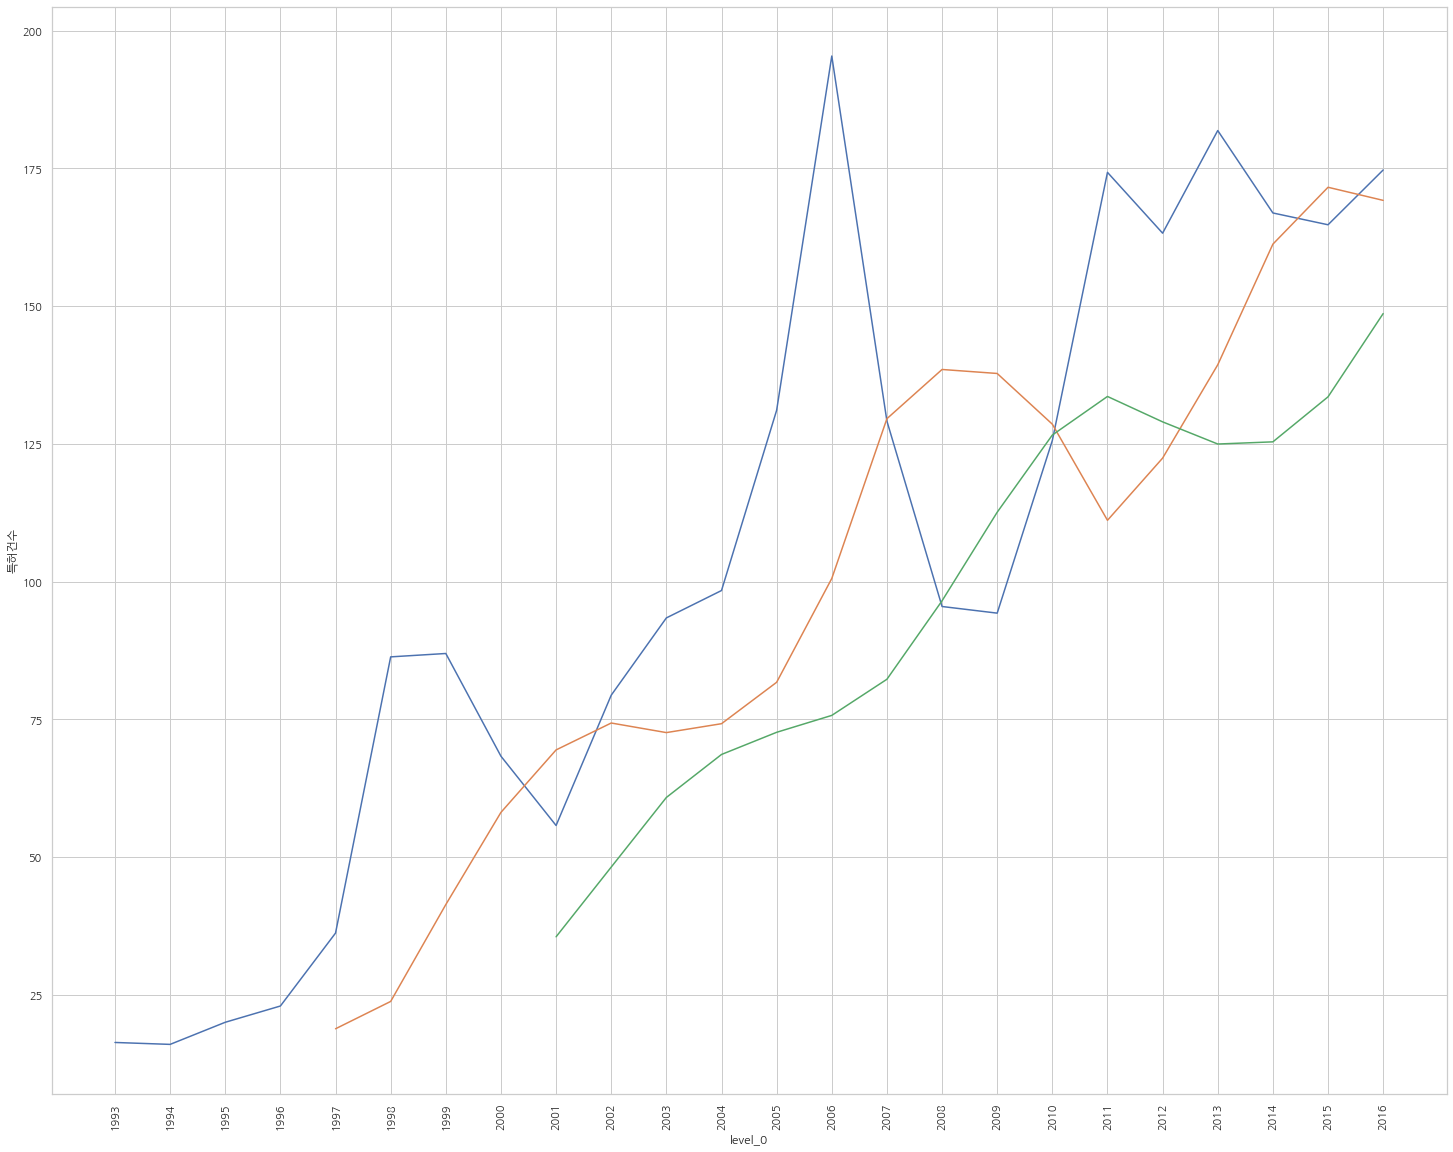

In [321]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.lineplot(data=new_df, x='level_0', y='특허건수')
sns.lineplot(data=new_df, x='level_0', y='MA4')
sns.lineplot(data=new_df, x='level_0', y='DMA4')



plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.show()